# Individual Conditional Expectation (ICE)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Loading the data

In [6]:
df = pd.read_excel("../data/dataproject2024.xlsx")

df.head()

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y),Pred_default (y_hat),PD,Group
0,1,34,55,4875,3087,0,36,0.047895,0,1,1,0,0,0.024480,1
1,2,5,29,13000,13000,0,60,0.091667,0,0,0,1,0,0.331661,0
2,3,14,38,17190,14190,0,60,0.088235,0,0,0,0,0,0.187505,0
3,4,16,37,22773,23568,0,48,0.110084,0,1,1,0,0,0.035441,1
4,5,1,61,7700,8526,0,48,0.123404,0,1,0,1,0,0.340883,0


### Training the model

In [18]:
features = ['Job tenure', 'Age', 'Car price', 'Funding amount', 'Down payment', 
            'Loan duration', 'Monthly payment', 'Credit event', 'Married', 
            'Homeowner', 'Group']
X = df[features]  
y = df['Pred_default (y_hat)']      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

### Applying ICE

In [19]:
feature_name = 'Age'
target_variable = 'PD'

feature_range = np.linspace(df[feature_name].min(), df[feature_name].max(), num=100)

In [20]:
def generate_ice_data(df, feature_name, feature_range):
    ice_data = []
    for _, row in df.iterrows():
        row_copy = row.copy()
        ice_lines = []
        for value in feature_range:
            row_copy[feature_name] = value
            ice_lines.append(row_copy[features].copy())  
        ice_data.append(ice_lines)
    return pd.concat([pd.DataFrame(ice_lines) for ice_lines in ice_data], axis=0)  

ice_data = generate_ice_data(df, feature_name, feature_range)

def predict_ice_data(ice_data, model):
    predictions = []
    for ice_row_set in ice_data:
        predictions_for_row = model.predict_proba(ice_row_set)[:, 1] 
        predictions.append(predictions_for_row)
    return predictions

ice_predictions = predict_ice_data(ice_data, model)

def plot_ice_curves(ice_predictions, feature_range, num_curves=10):
    plt.figure(figsize=(10, 6))
    for i in range(min(len(ice_predictions), num_curves)):  
        plt.plot(feature_range, ice_predictions[i], alpha=0.5)
    
    plt.xlabel(f'{feature_name}')
    plt.ylabel('Predicted PD')
    plt.title(f'ICE Plot for {feature_name}')
    plt.show()

plot_ice_curves(ice_predictions, feature_range)

c:\Users\user\anaconda3\Lib\site-packages\xgboost\data.py:1037: UserWarning: Unknown data type: <class 'int'>, trying to convert it to csr_matrix
  warnings.warn(


ValueError: training data did not have the following fields: Job tenure, Age, Car price, Funding amount, Down payment, Loan duration, Monthly payment, Credit event, Married, Homeowner, Group

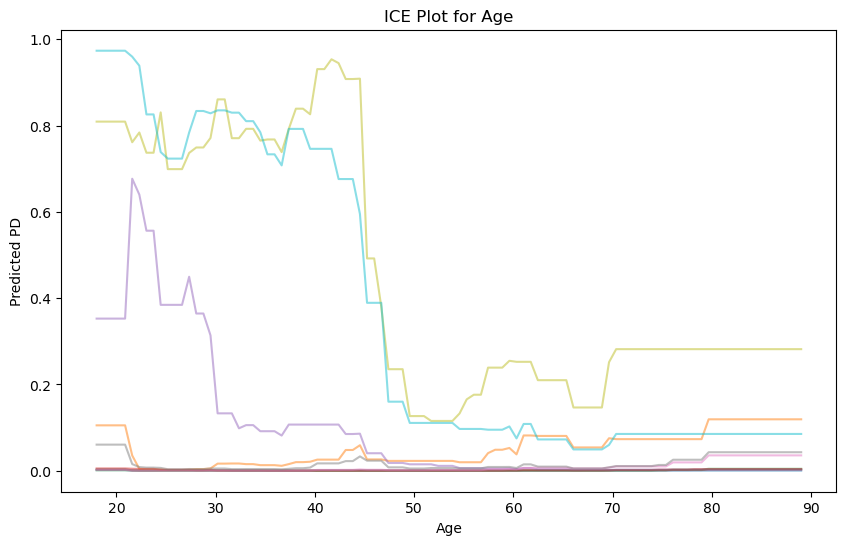

In [22]:
features = ['Job tenure', 'Age', 'Car price', 'Funding amount', 'Down payment', 
            'Loan duration', 'Monthly payment', 'Credit event', 'Married', 
            'Homeowner', 'Group']

feature_name = 'Age'
target_variable = 'PD'

feature_range = np.linspace(df[feature_name].min(), df[feature_name].max(), num=100)

def generate_ice_data(df, feature_name, feature_range):
    ice_data = []
    for _, row in df.iterrows():
        row_copy = row.copy()
        ice_lines = []
        for value in feature_range:
            row_copy[feature_name] = value
            ice_lines.append(row_copy[features].copy())  
        ice_data.append(ice_lines)
    return pd.concat([pd.DataFrame(ice_lines) for ice_lines in ice_data], axis=0)  

ice_data = generate_ice_data(df, feature_name, feature_range)

def predict_ice_data(ice_data, model, feature_range):
    predictions = []
    for i in range(0, len(ice_data), len(feature_range)):
        ice_row_set = ice_data.iloc[i:i+len(feature_range)]
        preds_for_row = model.predict_proba(ice_row_set)[:, 1] 
        predictions.append(preds_for_row)
    return predictions

ice_predictions = predict_ice_data(ice_data, model, feature_range)

def plot_ice_curves(ice_predictions, feature_range, num_curves=10):
    plt.figure(figsize=(10, 6))
    for i in range(min(len(ice_predictions), num_curves)): 
        plt.plot(feature_range, ice_predictions[i], alpha=0.5)
    
    plt.xlabel(f'{feature_name}')
    plt.ylabel('Predicted PD')
    plt.title(f'ICE Plot for {feature_name}')
    plt.show()

plot_ice_curves(ice_predictions, feature_range)